# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ray\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")


In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)
newsapi

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_news = newsapi.get_everything(q="bitcoin",language="en", sort_by="relevancy")

In [5]:
#### The newsapi limits to 200 chars/article so can't read the entire text in for analysis...hence why "chars" is dominating my word clouds!
btc_news['articles'][0]['content']

"You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]"

In [6]:
btc_news["totalResults"]

6889

In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news = newsapi.get_everything(q="eth AND ethereum",language="en",sort_by="relevancy")

In [8]:
eth_news["totalResults"]

621

In [9]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE! - General function for sentiment scores DataFrame: 
def create_df(news):
    articles = []
    for article in news:
        try:
#             title = article["title"]
#             description = article["description"]
            
            text = article["content"]
            res = analyzer.polarity_scores(text)
            pos = res['pos']
            neg = res['neg']
            neu = res['neu']
            com = res['compound']
            #date = article["publishedAt"]#[:10]

            articles.append({
#                 "title": title,
#                 "description": description,
                "Text": text,
#                 "Res": res,
                "Pos": pos,
                "Neg": neg,
                "Neu": neu,
                "Compound": com
#                 "date": date,
#                 "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [10]:
# Bitcoin sentiment scores dataframe
btc_sentiment_df = create_df(btc_news["articles"])
btc_sentiment_df.head()

,Text,Pos,Neg,Neu,Compound
0,You won't have to stick to Bitcoin if you're d...,0.127,0.036,0.838,0.5574
1,Four months after Twitter first introduced in-...,0.000,0.000,1.000,0.0000
2,Bitcoin and similar blockchain-based cryptos e...,0.000,0.000,1.000,0.0000
3,Its the countrys latest crackdown on digital c...,0.000,0.000,1.000,0.0000
4,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,0.052,0.000,0.948,0.1779


In [11]:
# Ethereum sentiment scores dataframe
eth_sentiment_df = create_df(eth_news["articles"])
eth_sentiment_df.head()

,Text,Pos,Neg,Neu,Compound
0,Vitalik Buterin\r\nVitalik Buterin dreamed up ...,0.000,0.000,1.000,0.0000
1,Illustration by Alex Castro / The Verge\r\n\n ...,0.126,0.064,0.810,0.2960
2,"This Tuesday, the 'altcoin' Solana (SOL) becam...",0.094,0.000,0.906,0.4588
3,"Hello friends, and welcome back to Week in Rev...",0.218,0.047,0.735,0.8268
4,The search for status online has branched into...,0.218,0.000,0.782,0.7964


In [12]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_sentiment_df.describe()

,Pos,Neg,Neu,Compound
count,20.000000,20.000000,20.000000,20.00000
mean,0.047000,0.030550,0.922500,0.07637
std,0.043151,0.051263,0.063573,0.33946
min,0.000000,0.000000,0.765000,-0.70960
25%,0.000000,0.000000,0.890250,0.00000
50%,0.048000,0.000000,0.913000,0.08980
75%,0.076250,0.043000,0.965500,0.25220
max,0.127000,0.195000,1.000000,0.55740


In [13]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_sentiment_df.describe()

,Pos,Neg,Neu,Compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.088300,0.042200,0.869550,0.189650
std,0.069641,0.061797,0.092474,0.412274
min,0.000000,0.000000,0.731000,-0.690800
25%,0.029250,0.000000,0.804500,0.000000
50%,0.090000,0.000000,0.853500,0.164500
75%,0.123750,0.066000,0.952750,0.467575
max,0.218000,0.162000,1.000000,0.826800


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH had the highest mean positive score with 0.084050 vs BTC which had 0.051550

Q: Which coin had the highest compound score?

A: ETH had both the highest mean compound score and the highest max compound score. 

Q. Which coin had the highest positive score?

A: ETH had the highest positive score with 0.218000 vs BTC which had 0.127000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addon = {'hello', 'welcome', 'said', 'also', 'stick', 'recently'}

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ',str(text))
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
        
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_sentiment_df['tokens'] = btc_sentiment_df['Text'].apply(lambda text: tokenizer(text))
btc_sentiment_df.head()

,Text,Pos,Neg,Neu,Compound,tokens
0,You won't have to stick to Bitcoin if you're d...,0.127,0.036,0.838,0.5574,"[bitcoin, determined, pay, movie, ticket, cryp..."
1,Four months after Twitter first introduced in-...,0.000,0.000,1.000,0.0000,"[four, month, twitter, first, introduced, app,..."
2,Bitcoin and similar blockchain-based cryptos e...,0.000,0.000,1.000,0.0000,"[bitcoin, similar, blockchain, based, cryptos,..."
3,Its the countrys latest crackdown on digital c...,0.000,0.000,1.000,0.0000,"[country, latest, crackdown, digital, currency..."
4,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,0.052,0.000,0.948,0.1779,"[installed, bitcoin, atm, today, bitcoin, offi..."


In [18]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_sentiment_df['tokens'] = eth_sentiment_df['Text'].apply(lambda text: tokenizer(text))
eth_sentiment_df.head()

,Text,Pos,Neg,Neu,Compound,tokens
0,Vitalik Buterin\r\nVitalik Buterin dreamed up ...,0.000,0.000,1.000,0.0000,"[vitalik, buterin, vitalik, buterin, dreamed, ..."
1,Illustration by Alex Castro / The Verge\r\n\n ...,0.126,0.064,0.810,0.2960,"[illustration, alex, castro, verge, collectors..."
2,"This Tuesday, the 'altcoin' Solana (SOL) becam...",0.094,0.000,0.906,0.4588,"[tuesday, altcoin, solana, sol, became, sevent..."
3,"Hello friends, and welcome back to Week in Rev...",0.218,0.047,0.735,0.8268,"[friend, back, week, review, last, week, dove,..."
4,The search for status online has branched into...,0.218,0.000,0.782,0.7964,"[search, status, online, ha, branched, truly, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_token_string = btc_sentiment_df['tokens'].apply(lambda token: ' '.join(token))
btc_bigram = ngrams(btc_token_string, n=2)
# print(list(btc_bigram))

In [21]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_token_string = eth_sentiment_df['tokens'].apply(lambda token: ' '.join(token))
eth_bigram = ngrams(eth_token_string, n=2)
# print(dict(eth_bigram))

In [22]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [26]:
# btc_string = btc_sentiment_df['Text'].str.cat()
# btc_top10 = token_count(btc_string, 10)
# btc_top10

In [27]:
# I couldn't crack this token_count function to punch out the counts to display them properly so I redefined these new functions (below) to process the raw text again.
# Sorry for the double up

In [28]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    return output

In [29]:
def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [32]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
word_counter(btc_sentiment_df['Text'])

,word,count
0,bitcoin,21
1,char,18
2,el,11
3,cryptocurrency,10
4,first,8
5,country,8
6,salvador,8
7,company,4
8,tip,4
9,central,4


In [33]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
word_counter(eth_sentiment_df['Text'])

,word,count
0,char,20
1,ethereum,9
2,ha,7
3,nft,6
4,cryptocurrency,5
5,crypto,5
6,worth,4
7,nfts,4
8,week,3
9,network,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

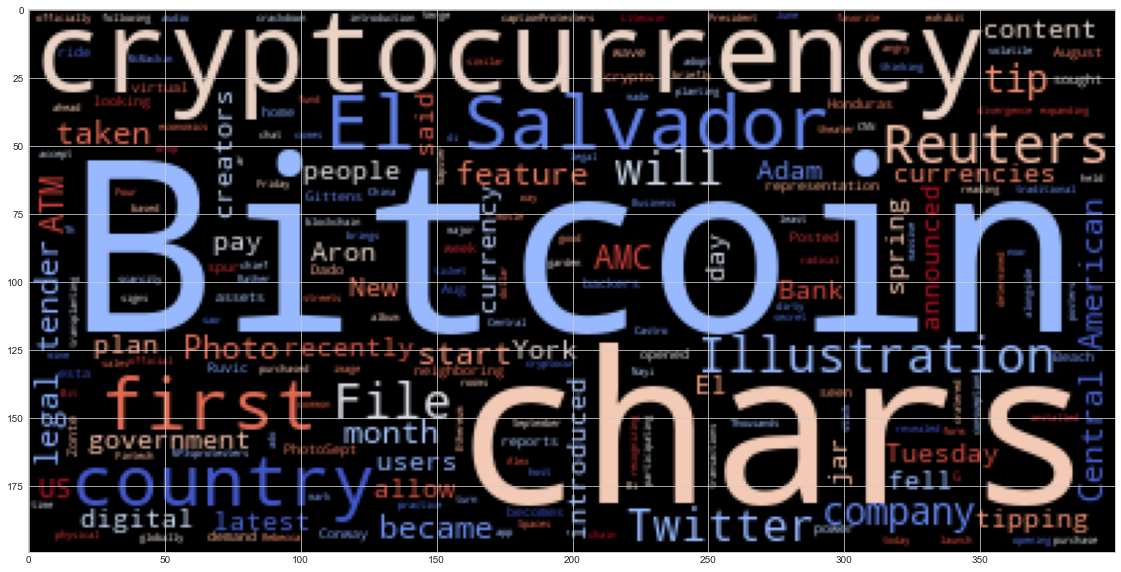

In [35]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_wc = WordCloud(colormap = 'coolwarm').generate((btc_sentiment_df['Text']).str.cat())
plt.imshow(btc_wc)

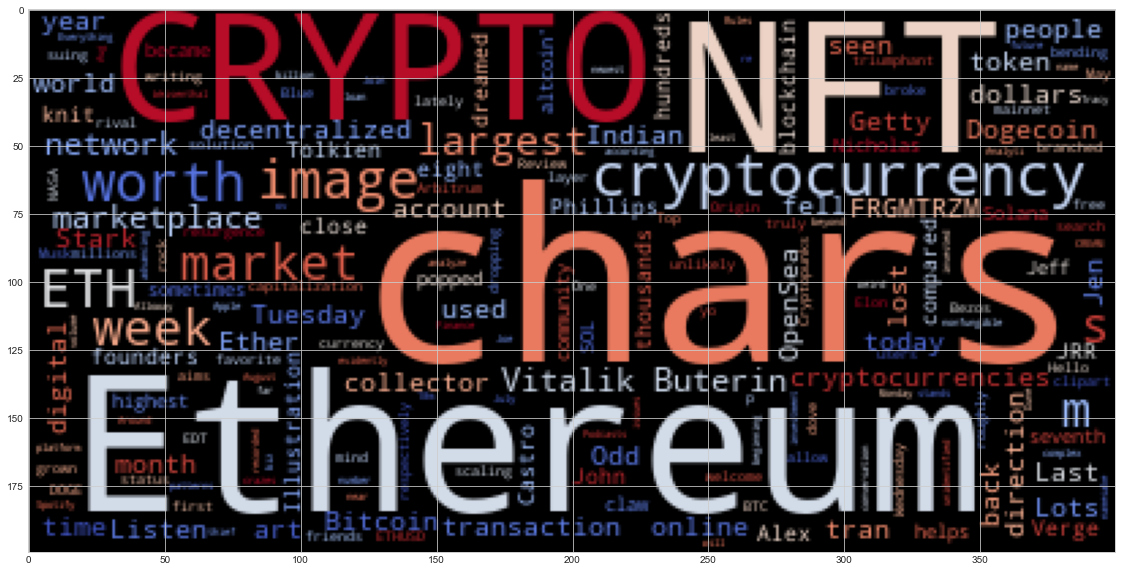

In [37]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_wc = WordCloud(colormap = 'coolwarm').generate((eth_sentiment_df['Text']).str.cat())
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [39]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [47]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
# btc_doc = nlp(btc_sentiment_df['Text'].tolist())
btc_string = btc_sentiment_df['Text'].str.cat()
# btc_string

In [48]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(btc_string)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data['title']='BTC NER'

In [63]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [75]:
# List all Entities
# YOUR CODE HERE!
def show_ents(doc):
    if doc.ents: 
        for ent in doc.ents: 
            print(ent.label_+ ' - '+str(spacy.explain(ent.label_)+ ' - '+ent.text)) 
        else: print('No named entities found.')

In [76]:
show_ents(doc)

ORG - Companies, agencies, institutions, etc. - AMC
PERSON - People, including fictional - Adam Aron
PERSON - People, including fictional - Ethereum
DATE - Absolute or relative dates or periods - months
PERSON - People, including fictional - Alex Castro
WORK_OF_ART - Titles of books, songs, etc. - The Verge

ORG - Companies, agencies, institutions, etc. - The Peoples Bank of China
DATE - Absolute or relative dates or periods - Friday
ORG - Companies, agencies, institutions, etc. - Bitcoin ATM
DATE - Absolute or relative dates or periods - today
GPE - Countries, cities, states - El Salvador
GPE - Countries, cities, states - US
NORP - Nationalities or religious or political groups - Central American
ORDINAL - "first", "second", etc. - first
GPE - Countries, cities, states - El Salvador
CARDINAL - Numerals that do not fall under another type - at least 200
DATE - Absolute or relative dates or periods - Tuesday
ORG - Companies, agencies, institutions, etc. - Th
CARDINAL - Numerals that do 

---

### Ethereum NER

In [77]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
# eth_doc = nlp(eth_sentiment_df['Text'].tolist())
eth_string = eth_sentiment_df['Text'].str.cat()
# eth_string

In [78]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth = nlp(eth_string)

# Add a title to the document
# YOUR CODE HERE!
eth.user_data['title']='ETH NER'

In [80]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth, style='ent')

In [81]:
# List all Entities
# YOUR CODE HERE!
show_ents(eth)

PERSON - People, including fictional - Vitalik Buterin
PERSON - People, including fictional - Vitalik Buterin
DATE - Absolute or relative dates or periods - 2013
PERSON - People, including fictional - Getty Images
PERSON - People, including fictional - John Phillips
PERSON - People, including fictional - Vitalik Buterin
CARDINAL - Numerals that do not fall under another type - eight
PERSON - People, including fictional - Alex Castro
WORK_OF_ART - Titles of books, songs, etc. - The Verge

 


 Collectors
CARDINAL - Numerals that do not fall under another type - hundreds of thousands
DATE - Absolute or relative dates or periods - Last month
PERSON - People, including fictional - Jeff Nicholas
DATE - Absolute or relative dates or periods - Tuesday
PERSON - People, including fictional - Solana
ORDINAL - "first", "second", etc. - seventh
ORG - Companies, agencies, institutions, etc. - Dogecoin
PERSON - People, including fictional - Elon Musk's
GPE - Countries, cities, states - Ethereum
DATE

---